Epoch 1: 100%|██████████| 50/50 [00:44<00:00,  1.13it/s]


Epoch 1 | Train Loss: 0.00340 | Val Loss: 0.00171


Epoch 2: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 2 | Train Loss: 0.00075 | Val Loss: 0.00096


Epoch 3: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 3 | Train Loss: 0.00058 | Val Loss: 0.00150


Epoch 4: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 4 | Train Loss: 0.00053 | Val Loss: 0.00061


Epoch 5: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 5 | Train Loss: 0.00045 | Val Loss: 0.00027


Epoch 6: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 6 | Train Loss: 0.00042 | Val Loss: 0.00053


Epoch 7: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 7 | Train Loss: 0.00035 | Val Loss: 0.00026


Epoch 8: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 8 | Train Loss: 0.00031 | Val Loss: 0.00030


Epoch 9: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 9 | Train Loss: 0.00029 | Val Loss: 0.00031


Epoch 10: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 10 | Train Loss: 0.00027 | Val Loss: 0.00070


Epoch 11: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 11 | Train Loss: 0.00028 | Val Loss: 0.00014


Epoch 12: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 12 | Train Loss: 0.00025 | Val Loss: 0.00023


Epoch 13: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 13 | Train Loss: 0.00024 | Val Loss: 0.00020


Epoch 14: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 14 | Train Loss: 0.00020 | Val Loss: 0.00033


Epoch 15: 100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


Epoch 15 | Train Loss: 0.00020 | Val Loss: 0.00014


Epoch 16: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 16 | Train Loss: 0.00024 | Val Loss: 0.00018


Epoch 17: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 17 | Train Loss: 0.00018 | Val Loss: 0.00023


Epoch 18: 100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


Epoch 18 | Train Loss: 0.00019 | Val Loss: 0.00048


Epoch 19: 100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


Epoch 19 | Train Loss: 0.00019 | Val Loss: 0.00034


Epoch 20: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 20 | Train Loss: 0.00019 | Val Loss: 0.00038


Epoch 21: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 21 | Train Loss: 0.00017 | Val Loss: 0.00010


Epoch 22: 100%|██████████| 50/50 [00:42<00:00,  1.16it/s]


Epoch 22 | Train Loss: 0.00014 | Val Loss: 0.00019


Epoch 23: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 23 | Train Loss: 0.00016 | Val Loss: 0.00009


Epoch 24: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


Epoch 24 | Train Loss: 0.00016 | Val Loss: 0.00017


Epoch 25: 100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


Epoch 25 | Train Loss: 0.00015 | Val Loss: 0.00012


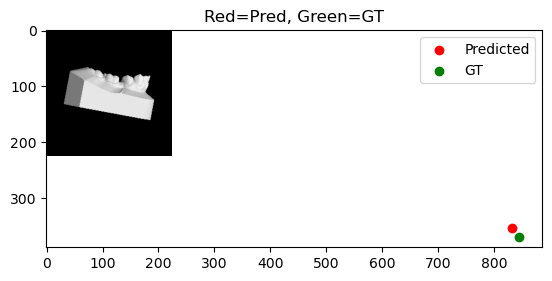

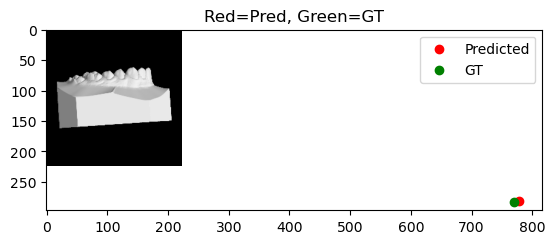

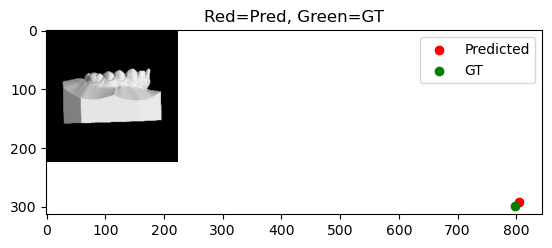

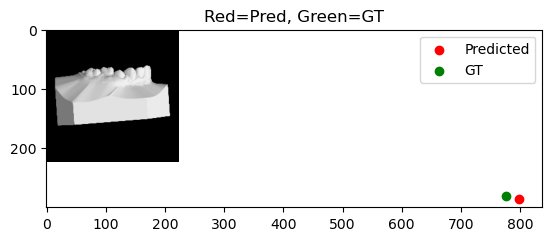

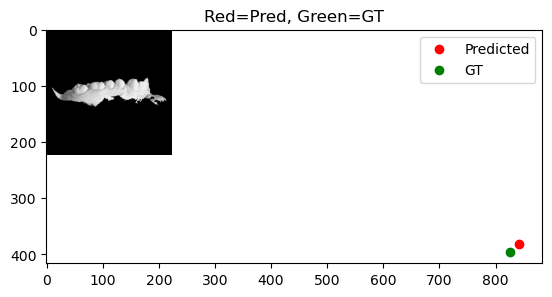

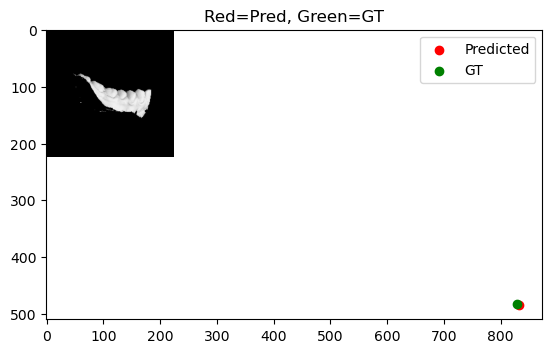

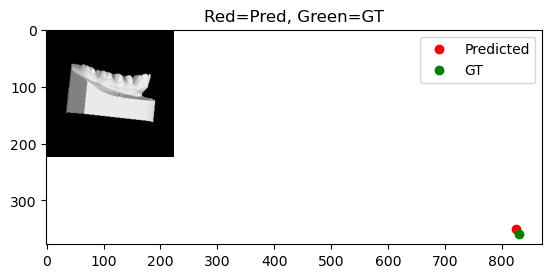

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import cv2
import os
import numpy as np
from torchvision import models, transforms
from tqdm import tqdm

# --- Constants ---
IMG_SIZE = 224  # Resize for training (for speed and augmentation)
DATA_ROOT = r"C:\STUDIE\4. Semester\Dataprojekt\Dataprojekt\Data\Clean Data\Overbite Data"
CSV_PATH = os.path.join(DATA_ROOT, "Updated_Labels.csv")
TRAIN_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Data Pairs")
VAL_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Verication data")
TEST_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Test data")

# --- Dataset ---
class KeypointDataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=IMG_SIZE, transform=None, subset=None):
        df = pd.read_csv(csv_file)
        # Only keep samples that are in img_dir
        all_imgs = set(os.listdir(img_dir))
        self.data = df[df["Filename"].isin(all_imgs)].reset_index(drop=True)
        self.img_dir = img_dir
        self.img_size = img_size
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Filename"])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.img_size, self.img_size))
        kp_x = row["X"] / 1024   # Normalize to [0,1]
        kp_y = row["Y"] / 1024
        if self.transform:
            img = self.transform(img)
        else:
            img = torch.tensor(img / 255.0, dtype=torch.float32).permute(2,0,1)
        target = torch.tensor([kp_x, kp_y], dtype=torch.float32)
        return img, target

# --- Augmentations ---
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15),
    transforms.ToTensor(),
])

# --- DataLoader ---
train_set = KeypointDataset(CSV_PATH, TRAIN_IMG_DIR, IMG_SIZE, transform=train_transform)
val_set = KeypointDataset(CSV_PATH, VAL_IMG_DIR, IMG_SIZE)
test_set = KeypointDataset(CSV_PATH, TEST_IMG_DIR, IMG_SIZE)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# --- Model: ResNet18 Backbone ---
class KeypointRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(weights=None)  # Or weights='IMAGENET1K_V1' for pretrained
        self.backbone = nn.Sequential(*list(backbone.children())[:-1])  # Remove final FC
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 2),  # (x, y)
            nn.Sigmoid()  # Output in [0,1]
        )
    def forward(self, x):
        features = self.backbone(x)
        return self.fc(features)

model = KeypointRegressor()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# --- Training Loop ---
for epoch in range(25):
    model.train()
    train_loss = 0
    for imgs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        optimizer.zero_grad()
        preds = model(imgs)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * imgs.size(0)
    train_loss /= len(train_loader.dataset)
    
    # Validation loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for imgs, targets in val_loader:
            preds = model(imgs)
            loss = criterion(preds, targets)
            val_loss += loss.item() * imgs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.5f} | Val Loss: {val_loss:.5f}")

# --- Example: Predict on test images and visualize ---
import matplotlib.pyplot as plt

model.eval()
for i, (img, target) in enumerate(test_loader):
    pred = model(img).detach().numpy()
    # Convert normalized to pixels
    x_pred = (pred[0,0] * 1024)
    y_pred = (pred[0,1] * 1024)
    img_np = img[0].permute(1,2,0).numpy()
    plt.imshow(img_np)
    plt.scatter([x_pred], [y_pred], color='r', label='Predicted')
    plt.scatter([target[0,0].item()*1024], [target[0,1].item()*1024], color='g', label='GT')
    plt.legend()
    plt.title(f"Red=Pred, Green=GT")
    plt.show()
    if i > 5: break  # Show 6 examples


In [6]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Constants ---
IMG_SIZE = 224
DATA_ROOT = r"C:\STUDIE\4. Semester\Dataprojekt\Dataprojekt\Data\Clean Data\Overbite Data"
CSV_PATH = os.path.join(DATA_ROOT, "Updated_Labels.csv")
TEST_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Test data")

# --- Dataset class ---
class KeypointDataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=IMG_SIZE, transform=None):
        df = pd.read_csv(csv_file)
        all_imgs = set(os.listdir(img_dir))
        self.data = df[df["Filename"].isin(all_imgs)].reset_index(drop=True)
        self.img_dir = img_dir
        self.img_size = img_size
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Filename"])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.img_size, self.img_size))
        kp_x = row["X"] / 1024   # Normalize to [0,1]
        kp_y = row["Y"] / 1024
        if self.transform:
            img = self.transform(img)
        else:
            img = torch.tensor(img / 255.0, dtype=torch.float32).permute(2,0,1)
        target = torch.tensor([kp_x, kp_y], dtype=torch.float32)
        return img, target, row["Filename"]

# --- Reload test set with batch_size=1 for visualization ---
test_set = KeypointDataset(CSV_PATH, TEST_IMG_DIR, IMG_SIZE)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)


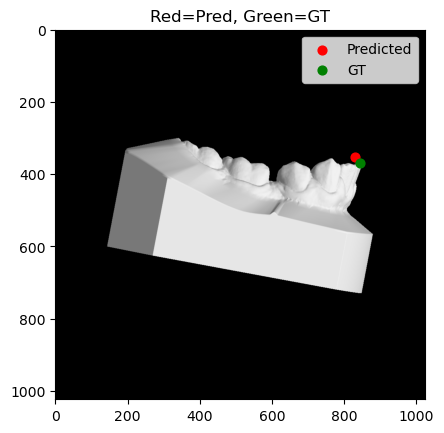

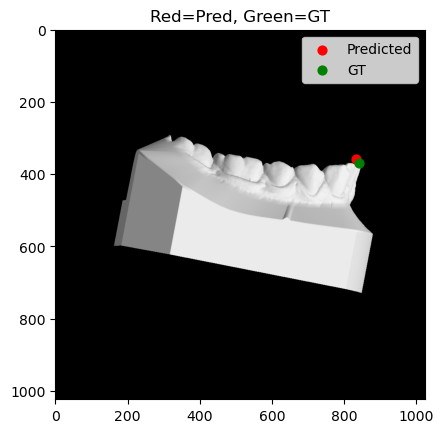

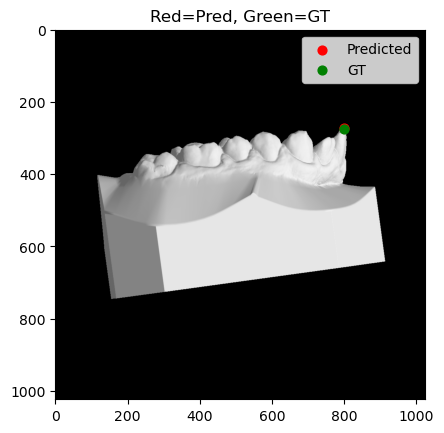

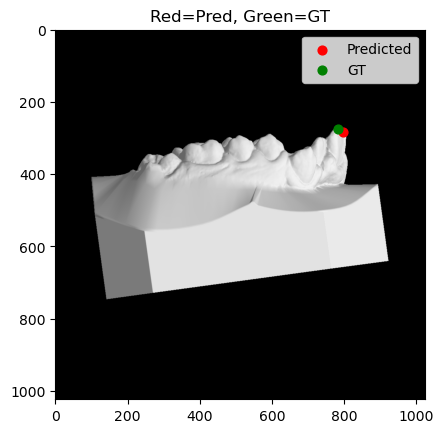

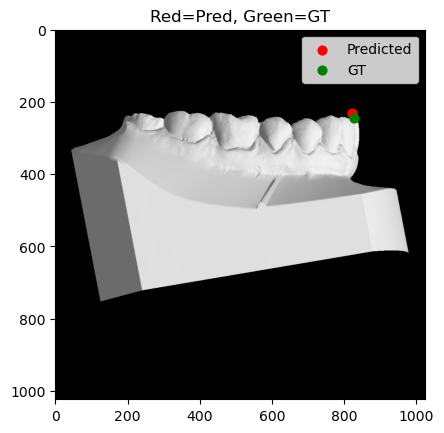

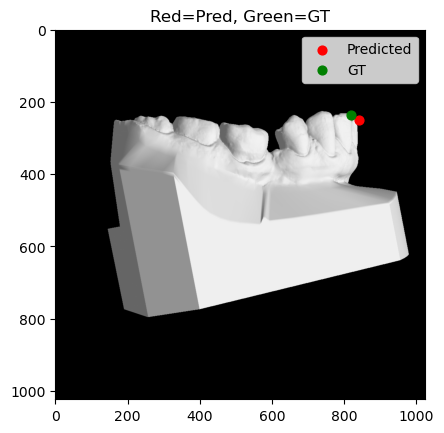

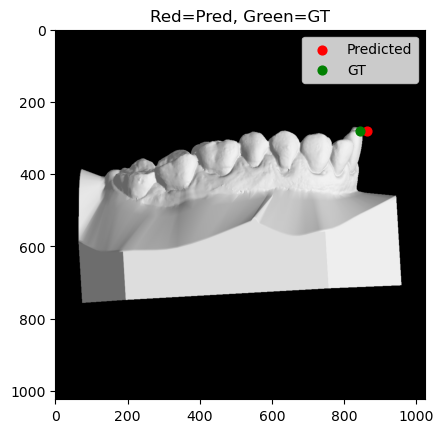

In [8]:
model.eval()
for i, (img, target, fname) in enumerate(test_loader):
    pred = model(img).detach().numpy()
    # Convert normalized prediction to original pixel coordinates
    x_pred = pred[0, 0] * 1024
    y_pred = pred[0, 1] * 1024
    x_gt = target[0, 0].item() * 1024
    y_gt = target[0, 1].item() * 1024

    # Get the filename string, even if wrapped in tuple/list
    fname_str = fname if isinstance(fname, str) else fname[0]
    orig_img_path = os.path.join(TEST_IMG_DIR, fname_str)
    orig_img = cv2.imread(orig_img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    plt.imshow(orig_img)
    plt.scatter([x_pred], [y_pred], color='r', s=40, label='Predicted')
    plt.scatter([x_gt], [y_gt], color='g', s=40, label='GT')
    plt.legend()
    plt.title("Red=Pred, Green=GT")
    plt.show()
    if i > 5: break  # Show 6 examples


Mean pixel error: 13.19
Median pixel error: 11.37


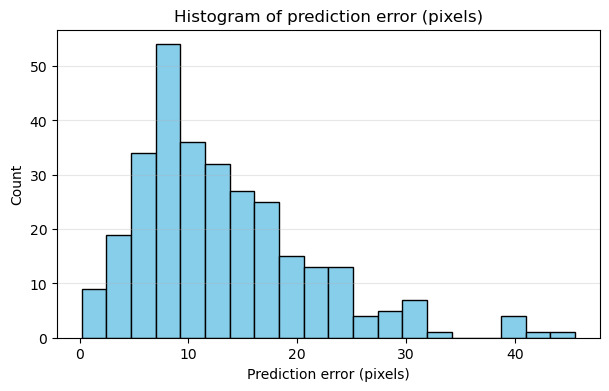

In [9]:
import numpy as np
import matplotlib.pyplot as plt

distances = []

model.eval()
for img, target, fname in test_loader:
    pred = model(img).detach().numpy()
    # Predicted coordinates in pixels
    x_pred = pred[0, 0] * 1024
    y_pred = pred[0, 1] * 1024
    # Ground truth in pixels
    x_gt = target[0, 0].item() * 1024
    y_gt = target[0, 1].item() * 1024
    # Euclidean distance
    dist = np.sqrt((x_pred - x_gt) ** 2 + (y_pred - y_gt) ** 2)
    distances.append(dist)

distances = np.array(distances)
print(f"Mean pixel error: {distances.mean():.2f}")
print(f"Median pixel error: {np.median(distances):.2f}")

# Plot histogram
plt.figure(figsize=(7, 4))
plt.hist(distances, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Prediction error (pixels)")
plt.ylabel("Count")
plt.title("Histogram of prediction error (pixels)")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


Mean error: 1.06 mm


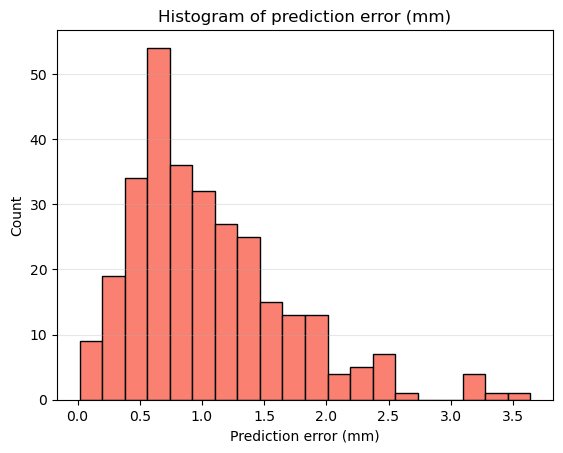

In [10]:
distances_mm = distances * 0.08
print(f"Mean error: {distances_mm.mean():.2f} mm")
plt.hist(distances_mm, bins=20, color="salmon", edgecolor="black")
plt.xlabel("Prediction error (mm)")
plt.ylabel("Count")
plt.title("Histogram of prediction error (mm)")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


# Ny Model

In [15]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

# --- Constants ---
IMG_SIZE = 512   # You can use 768 or 1024 if your GPU allows!
SIGMA = 3
DATA_ROOT = r"C:\STUDIE\4. Semester\Dataprojekt\Dataprojekt\Data\Clean Data\Overbite Data"
CSV_PATH = os.path.join(DATA_ROOT, "Updated_Labels.csv")
TRAIN_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Data Pairs")

# --- Heatmap Utility ---
def make_heatmap(x, y, size=IMG_SIZE, sigma=SIGMA):
    X, Y = np.meshgrid(np.arange(size), np.arange(size))
    heatmap = np.exp(-((X - x) ** 2 + (Y - y) ** 2) / (2 * sigma ** 2))
    return heatmap.astype(np.float32)

# --- Dataset ---
class HeatmapKeypointDataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=IMG_SIZE, sigma=SIGMA, transform=None):
        df = pd.read_csv(csv_file)
        all_imgs = set(os.listdir(img_dir))
        self.data = df[df["Filename"].isin(all_imgs)].reset_index(drop=True)
        self.img_dir = img_dir
        self.img_size = img_size
        self.sigma = sigma
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Filename"])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.img_size, self.img_size))
        kp_x = row["X"] * (self.img_size / 1024)
        kp_y = row["Y"] * (self.img_size / 1024)
        heatmap = make_heatmap(kp_x, kp_y, size=self.img_size, sigma=self.sigma)
        if self.transform:
            img = self.transform(img)
        else:
            img = torch.tensor(img / 255.0, dtype=torch.float32).permute(2,0,1)
        heatmap = torch.tensor(heatmap, dtype=torch.float32).unsqueeze(0)
        return img, heatmap, row["Filename"], kp_x, kp_y

# --- Model (Simple U-Net) ---
class UNetSmall(nn.Module):
    def __init__(self, in_ch=3, out_ch=1, base=32):
        super().__init__()
        self.enc1 = nn.Sequential(nn.Conv2d(in_ch, base, 3, 1, 1), nn.ReLU(),
                                  nn.Conv2d(base, base, 3, 1, 1), nn.ReLU())
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = nn.Sequential(nn.Conv2d(base, base*2, 3, 1, 1), nn.ReLU(),
                                  nn.Conv2d(base*2, base*2, 3, 1, 1), nn.ReLU())
        self.pool2 = nn.MaxPool2d(2)
        self.middle = nn.Sequential(nn.Conv2d(base*2, base*4, 3, 1, 1), nn.ReLU())
        self.up1 = nn.ConvTranspose2d(base*4, base*2, 2, 2)
        self.dec1 = nn.Sequential(nn.Conv2d(base*4, base*2, 3, 1, 1), nn.ReLU())
        self.up2 = nn.ConvTranspose2d(base*2, base, 2, 2)
        self.dec2 = nn.Sequential(nn.Conv2d(base*2, base, 3, 1, 1), nn.ReLU())
        self.final = nn.Conv2d(base, out_ch, 1)
    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        m = self.middle(self.pool2(e2))
        d1 = self.up1(m)
        d1 = torch.cat([d1, e2], dim=1)
        d1 = self.dec1(d1)
        d2 = self.up2(d1)
        d2 = torch.cat([d2, e1], dim=1)
        d2 = self.dec2(d2)
        out = self.final(d2)
        return out  # shape: (B, 1, H, W)

# --- Training ---
train_set = HeatmapKeypointDataset(CSV_PATH, TRAIN_IMG_DIR, img_size=IMG_SIZE, sigma=SIGMA)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=0)

model = UNetSmall(in_ch=3, out_ch=1, base=32)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(15):
    model.train()
    epoch_loss = 0
    for img, heatmap, *_ in train_loader:
        out = model(img)
        loss = criterion(out, heatmap)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * img.size(0)
    epoch_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch+1}: loss={epoch_loss:.5f}")


KeyboardInterrupt: 

In [ ]:
# Optionally save the model
torch.save(model.state_dict(), "heatmap_keypoint_model.pth")

In [ ]:
import matplotlib.pyplot as plt

VAL_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Verication data")
TEST_IMG_DIR = os.path.join(DATA_ROOT, "Annotated Test data")
IMG_SIZE = 1024   # Must match training size
SIGMA = 3

def heatmap_to_coord(hm):
    hmw = hm.squeeze()
    idx = hmw.argmax()
    y, x = np.unravel_index(idx, hmw.shape)
    return x, y

# Use either validation or test data for testing
test_set = HeatmapKeypointDataset(CSV_PATH, TEST_IMG_DIR, img_size=IMG_SIZE, sigma=SIGMA)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

model.eval()
distances = []
for img, heatmap, fname, true_x, true_y in test_loader:
    with torch.no_grad():
        out = model(img)
    pred_hm = out[0, 0].detach().cpu().numpy()
    x_pred, y_pred = heatmap_to_coord(pred_hm)

    scale = 1024 / IMG_SIZE
    x_pred_real = x_pred * scale
    y_pred_real = y_pred * scale
    x_true_real = true_x.item() * scale
    y_true_real = true_y.item() * scale

    dist = np.sqrt((x_pred_real - x_true_real) ** 2 + (y_pred_real - y_true_real) ** 2)
    distances.append(dist)

    # Plot for first 6 examples
    if len(distances) <= 6:
        orig_img_path = os.path.join(TEST_IMG_DIR, fname if isinstance(fname, str) else fname[0])
        orig_img = cv2.imread(orig_img_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
        plt.imshow(orig_img)
        plt.scatter([x_pred_real], [y_pred_real], color='r', s=60, label='Predicted')
        plt.scatter([x_true_real], [y_true_real], color='g', s=60, label='GT')
        plt.legend()
        plt.title(f"Red=Pred, Green=GT\nErr={dist:.1f} px ({dist*0.08:.2f} mm)")
        plt.show()

# Show histogram
distances = np.array(distances)
print(f"Mean pixel error: {distances.mean():.2f}")
print(f"Mean mm error: {distances.mean()*0.08:.2f} mm")

plt.figure(figsize=(7,4))
plt.hist(distances, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Prediction error (pixels)")
plt.ylabel("Count")
plt.title("Histogram of prediction error (pixels)")
plt.grid(True, axis='y', alpha=0.3)
plt.show()
